In [1]:
import duckdb
import lancedb
import numpy as np
import pandas as pd
# pd.options.plotting.backend = "plotly"

/Users/jernejfrank/Documents/code/probable-guacamole/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Loading two ways

In [2]:
df = pd.read_csv(
    "/Users/jernejfrank/Documents/code/probable-guacamole/datasets/Auto.csv"
)
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [3]:
df_from_data = pd.read_csv(
    "/Users/jernejfrank/Documents/code/probable-guacamole/datasets/Auto.data",
    delim_whitespace=True,
)
df_from_data

/var/folders/_5/qn4m8hy526b4gsrvq_fc20x00000gn/T/ipykernel_80948/3336216678.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_from_data = pd.read_csv(


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
394,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
395,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


# Horsepower - Datacleaning 

In [4]:
df["horsepower"]

0      130
1      165
2      150
3      150
4      140
      ... 
392     86
393     52
394     84
395     79
396     82
Name: horsepower, Length: 397, dtype: object

In [5]:
np.unique(df["horsepower"])

array(['100', '102', '103', '105', '107', '108', '110', '112', '113',
       '115', '116', '120', '122', '125', '129', '130', '132', '133',
       '135', '137', '138', '139', '140', '142', '145', '148', '149',
       '150', '152', '153', '155', '158', '160', '165', '167', '170',
       '175', '180', '190', '193', '198', '200', '208', '210', '215',
       '220', '225', '230', '46', '48', '49', '52', '53', '54', '58',
       '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70',
       '71', '72', '74', '75', '76', '77', '78', '79', '80', '81', '82',
       '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93',
       '94', '95', '96', '97', '98', '?'], dtype=object)

In [6]:
df = pd.read_csv(
    "/Users/jernejfrank/Documents/code/probable-guacamole/datasets/Auto.data",
    na_values=["?"],
    delim_whitespace=True,
)
df

/var/folders/_5/qn4m8hy526b4gsrvq_fc20x00000gn/T/ipykernel_80948/1066119501.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86.0,2790.0,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52.0,2130.0,24.6,82,2,vw pickup
394,32.0,4,135.0,84.0,2295.0,11.6,82,1,dodge rampage
395,28.0,4,120.0,79.0,2625.0,18.6,82,1,ford ranger


In [7]:
df["horsepower"].sum()

np.float64(40952.0)

In [8]:
df.shape

(397, 9)

In [9]:
df_new = df.dropna()
df_new.shape

(392, 9)

# Selecting data

In [10]:
df = df_new
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin', 'name'],
      dtype='object')

In [11]:
df[:3]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite


In [12]:
df[df["year"] == 80]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
309,41.5,4,98.0,76.0,2144.0,14.7,80,2,vw rabbit
310,38.1,4,89.0,60.0,1968.0,18.8,80,3,toyota corolla tercel
311,32.1,4,98.0,70.0,2120.0,15.5,80,1,chevrolet chevette
312,37.2,4,86.0,65.0,2019.0,16.4,80,3,datsun 310
313,28.0,4,151.0,90.0,2678.0,16.5,80,1,chevrolet citation
314,26.4,4,140.0,88.0,2870.0,18.1,80,1,ford fairmont
315,24.3,4,151.0,90.0,3003.0,20.1,80,1,amc concord
316,19.1,6,225.0,90.0,3381.0,18.7,80,1,dodge aspen
317,34.3,4,97.0,78.0,2188.0,15.8,80,2,audi 4000
318,29.8,4,134.0,90.0,2711.0,15.5,80,3,toyota corona liftback


In [13]:
df = df.set_index("name")
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130.0,3504.0,12.0,70,1
buick skylark 320,15.0,8,350.0,165.0,3693.0,11.5,70,1
plymouth satellite,18.0,8,318.0,150.0,3436.0,11.0,70,1
amc rebel sst,16.0,8,304.0,150.0,3433.0,12.0,70,1
ford torino,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
ford mustang gl,27.0,4,140.0,86.0,2790.0,15.6,82,1
vw pickup,44.0,4,97.0,52.0,2130.0,24.6,82,2
dodge rampage,32.0,4,135.0,84.0,2295.0,11.6,82,1


In [14]:
rows = ["amc rebel sst", "ford torino"]
df.loc[rows]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
amc rebel sst,16.0,8,304.0,150.0,3433.0,12.0,70,1
ford torino,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [15]:
df.iloc[[3, 4]]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
amc rebel sst,16.0,8,304.0,150.0,3433.0,12.0,70,1
ford torino,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [16]:
df.iloc[:, [0, 2, 3]]

,mpg,displacement,horsepower
name,,,
chevrolet chevelle malibu,18.0,307.0,130.0
buick skylark 320,15.0,350.0,165.0
plymouth satellite,18.0,318.0,150.0
amc rebel sst,16.0,304.0,150.0
ford torino,17.0,302.0,140.0
...,...,...,...
ford mustang gl,27.0,140.0,86.0
vw pickup,44.0,97.0,52.0
dodge rampage,32.0,135.0,84.0


In [17]:
df.iloc[[3, 4], [0, 2, 3]]

,mpg,displacement,horsepower
name,,,
amc rebel sst,16.0,304.0,150.0
ford torino,17.0,302.0,140.0


In [18]:
df.loc[["ford galaxie 500"], ["mpg", "origin"]]

,mpg,origin
name,,
ford galaxie 500,15.0,1
ford galaxie 500,14.0,1
ford galaxie 500,14.0,1


# Advanced selection

## Pandas

In [19]:
df.loc[df["year"] > 80, ["weight", "origin"]]

,weight,origin
name,,
plymouth reliant,2490.0,1
buick skylark,2635.0,1
dodge aries wagon (sw),2620.0,1
chevrolet citation,2725.0,1
plymouth reliant,2385.0,1
toyota starlet,1755.0,3
plymouth champ,1875.0,1
honda civic 1300,1760.0,3
subaru,2065.0,3


In [20]:
df.loc[(df["year"] > 80) & (df["mpg"] > 30), ["weight", "origin"]]

,weight,origin
name,,
toyota starlet,1755.0,3
plymouth champ,1875.0,1
honda civic 1300,1760.0,3
subaru,2065.0,3
datsun 210 mpg,1975.0,3
toyota tercel,2050.0,3
mazda glc 4,1985.0,3
plymouth horizon 4,2215.0,1
ford escort 4w,2045.0,1


In [21]:
df.loc[
    (df["displacement"] < 300)
    & (df.index.str.contains("ford") | df.index.str.contains("datsun")),
    ["weight", "origin"],
].shape

(51, 2)

## Using SQL

In [22]:
db = lancedb.connect("/Users/jernejfrank/Documents/code/probable-guacamole/db/.lancedb")
db.table_names()

['Cars']

In [23]:
tbl = db.open_table("Cars")
cars_table = tbl.to_lance()

In [24]:
duckdb.query("SELECT * FROM cars_table")

┌────────┬───────────┬──────────────┬────────────┬────────┬──────────────┬───────┬────────┬────────────────────────────┐
│  mpg   │ cylinders │ displacement │ horsepower │ weight │ acceleration │ year  │ origin │            name            │
│ double │   int64   │    double    │  varchar   │ int64  │    double    │ int64 │ int64  │          varchar           │
├────────┼───────────┼──────────────┼────────────┼────────┼──────────────┼───────┼────────┼────────────────────────────┤
│   18.0 │         8 │        307.0 │ 130        │   3504 │         12.0 │    70 │      1 │ chevrolet chevelle malibu  │
│   15.0 │         8 │        350.0 │ 165        │   3693 │         11.5 │    70 │      1 │ buick skylark 320          │
│   18.0 │         8 │        318.0 │ 150        │   3436 │         11.0 │    70 │      1 │ plymouth satellite         │
│   16.0 │         8 │        304.0 │ 150        │   3433 │         12.0 │    70 │      1 │ amc rebel sst              │
│   17.0 │         8 │        30

In [25]:
duckdb.query("SELECT year, weight , origin FROM cars_table WHERE year > 80")

┌───────┬────────┬────────┐
│ year  │ weight │ origin │
│ int64 │ int64  │ int64  │
├───────┼────────┼────────┤
│    81 │   2490 │      1 │
│    81 │   2635 │      1 │
│    81 │   2620 │      1 │
│    81 │   2725 │      1 │
│    81 │   2385 │      1 │
│    81 │   1755 │      3 │
│    81 │   1875 │      1 │
│    81 │   1760 │      3 │
│    81 │   2065 │      3 │
│    81 │   1975 │      3 │
│     · │     ·  │      · │
│     · │     ·  │      · │
│     · │     ·  │      · │
│    82 │   2585 │      1 │
│    82 │   2835 │      1 │
│    82 │   2665 │      3 │
│    82 │   2370 │      1 │
│    82 │   2950 │      1 │
│    82 │   2790 │      1 │
│    82 │   2130 │      2 │
│    82 │   2295 │      1 │
│    82 │   2625 │      1 │
│    82 │   2720 │      1 │
├───────┴────────┴────────┤
│   59 rows (20 shown)    │
└─────────────────────────┘

In [26]:
duckdb.query(
    "SELECT year"
    ", weight "
    ", origin "
    "FROM cars_table "
    "WHERE 1=1 "
    "AND year > 80 "
    "AND mpg > 30"
)

┌───────┬────────┬────────┐
│ year  │ weight │ origin │
│ int64 │ int64  │ int64  │
├───────┼────────┼────────┤
│    81 │   1755 │      3 │
│    81 │   1875 │      1 │
│    81 │   1760 │      3 │
│    81 │   2065 │      3 │
│    81 │   1975 │      3 │
│    81 │   2050 │      3 │
│    81 │   1985 │      3 │
│    81 │   2215 │      1 │
│    81 │   2045 │      1 │
│    81 │   2190 │      2 │
│     · │     ·  │      · │
│     · │     ·  │      · │
│     · │     ·  │      · │
│    82 │   2245 │      3 │
│    82 │   1965 │      3 │
│    82 │   1965 │      3 │
│    82 │   1995 │      3 │
│    82 │   3015 │      1 │
│    82 │   2665 │      3 │
│    82 │   2370 │      1 │
│    82 │   2130 │      2 │
│    82 │   2295 │      1 │
│    82 │   2720 │      1 │
├───────┴────────┴────────┤
│   35 rows (20 shown)    │
└─────────────────────────┘

In [27]:
duckdb.query(
    "SELECT name"
    ", weight "
    ", origin "
    ", displacement "
    "FROM cars_table as t "
    "WHERE 1=1 "
    "AND t.displacement < 300 "
    "AND (t.name LIKE '%ford%' OR t.name LIKE '%datsun%')"
)

┌──────────────────────┬────────┬────────┬──────────────┐
│         name         │ weight │ origin │ displacement │
│       varchar        │ int64  │ int64  │    double    │
├──────────────────────┼────────┼────────┼──────────────┤
│ ford maverick        │   2587 │      1 │        200.0 │
│ ford pinto           │   2046 │      1 │         98.0 │
│ ford torino 500      │   3302 │      1 │        250.0 │
│ ford mustang         │   3139 │      1 │        250.0 │
│ ford pinto runabout  │   2226 │      1 │        122.0 │
│ ford pinto (sw)      │   2395 │      1 │        122.0 │
│ ford maverick        │   3021 │      1 │        250.0 │
│ ford pinto           │   2310 │      1 │        122.0 │
│ ford maverick        │   2875 │      1 │        200.0 │
│ ford pinto           │   2451 │      1 │        122.0 │
│     ·                │     ·  │      · │          ·   │
│     ·                │     ·  │      · │          ·   │
│     ·                │     ·  │      · │          ·   │
│ datsun 200-s

# Visualising

<Axes: xlabel='horsepower', ylabel='mpg'>

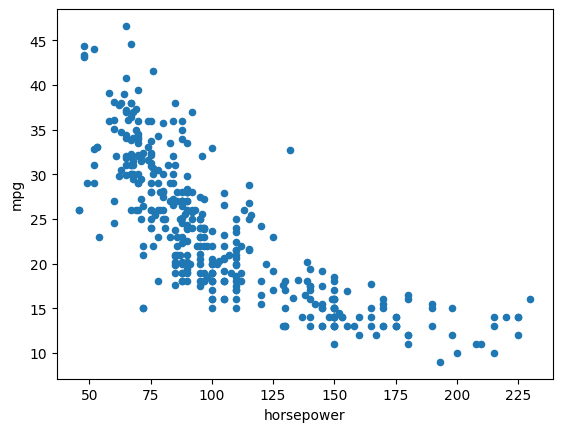

In [32]:
df.plot.scatter("horsepower", "mpg")

In [33]:
import plotly.express as px

df.cylinders = pd.Series(df.cylinders, dtype="category")
fig = px.box(df, x="cylinders", y="mpg")
fig.show()

In [34]:
px.histogram(df, x="mpg", nbins=12)

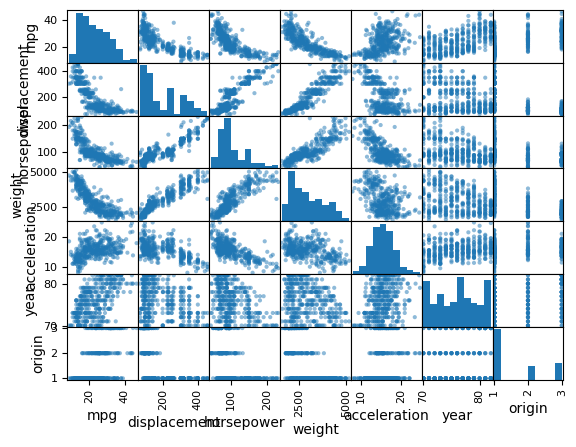

In [36]:
pd.plotting.scatter_matrix(df);